In [39]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [13]:
x = df[['Age','Fare','Family']]
y = df[['Survived']]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [27]:
x_train.isnull().mean()*100


Age       19.803371
Fare       5.196629
Family     0.000000
dtype: float64

In [36]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()
mean_age

29.56772329246935

In [32]:
mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [37]:
x_train['mean_age'] = x_train['Age'].fillna(mean_age)
x_train['median_age'] = x_train['Age'].fillna(median_age)

x_train['mean_fare'] = x_train['Fare'].fillna(mean_fare)
x_train['median_fare'] = x_train['Fare'].fillna(median_fare)

In [38]:
x_train

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
678,43.0,46.9000,7,43.000000,43.0,46.90000,46.9000
712,48.0,52.0000,1,48.000000,48.0,52.00000,52.0000
295,NaN,27.7208,0,29.567723,28.0,27.72080,27.7208
293,24.0,8.8500,0,24.000000,24.0,8.85000,8.8500
434,50.0,NaN,1,50.000000,50.0,32.48095,14.4542
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.65000,7.6500
213,30.0,13.0000,0,30.000000,30.0,13.00000,13.0000
178,30.0,13.0000,0,30.000000,30.0,13.00000,13.0000
198,NaN,7.7500,0,29.567723,28.0,7.75000,7.7500


<AxesSubplot:xlabel='Age', ylabel='Density'>

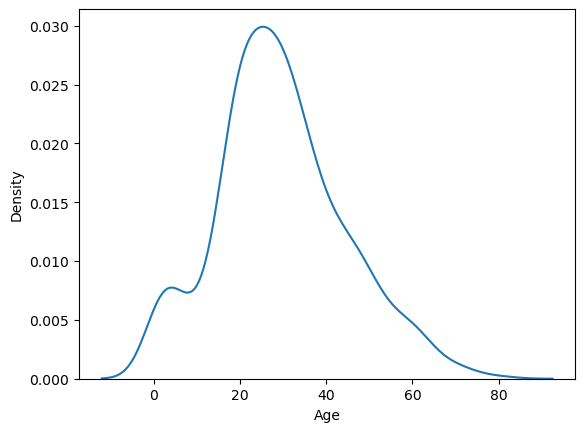

In [50]:
sns.kdeplot(x_train['Age'])

<AxesSubplot:xlabel='mean_age', ylabel='Density'>

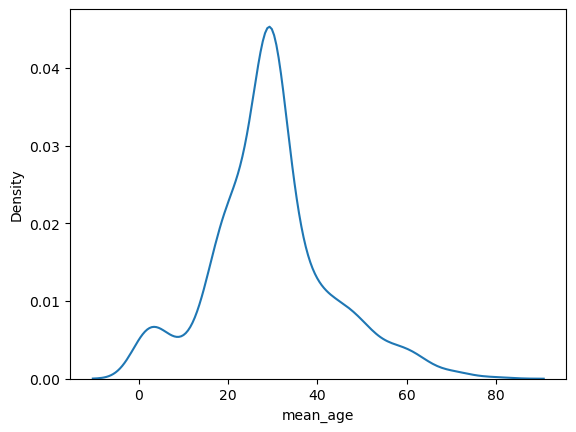

In [51]:
sns.kdeplot(x_train['mean_age'])

In [46]:
#Now we check variance

In [48]:
print("Original variance of Age",x_train['Age'].var())
print("mean age variance",x_train['mean_age'].var())
print("median age variance",x_train['median_age'].var())

Original variance of Age 219.72030814084243
mean age variance 176.1470824757808
median age variance 176.5379633746973


In [49]:
print("Original variance of fare",x_train['Fare'].var())
print("mean fare variance",x_train['mean_fare'].var())
print("median fare variance",x_train['median_fare'].var())

Original variance of fare 2552.5805842416985
mean fare variance 2419.7458702938184
median fare variance 2435.777983230333


In [53]:
x_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,219.720308,81.842204,-6.975514,219.720308,219.720308,77.263418,77.379395
Fare,81.842204,2552.580584,16.477062,65.341466,68.432965,2552.580584,2552.580584
Family,-6.975514,16.477062,2.530838,-5.592185,-5.522676,15.619606,15.638016
mean_age,219.720308,65.341466,-5.592185,176.147082,176.147082,61.941137,62.034114
median_age,219.720308,68.432965,-5.522676,176.147082,176.537963,64.871755,64.872229
mean_fare,77.263418,2552.580584,15.619606,61.941137,64.871755,2419.745870,2419.745870
median_fare,77.379395,2552.580584,15.638016,62.034114,64.872229,2419.745870,2435.777983


In [54]:
x_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.101337,-0.317731,1.000000,1.000000,0.099024,0.098783
Fare,0.101337,1.000000,0.202985,0.097106,0.101586,1.000000,1.000000
Family,-0.317731,0.202985,1.000000,-0.264857,-0.261275,0.199597,0.199173
mean_age,1.000000,0.097106,-0.264857,1.000000,0.998892,0.094876,0.094705
median_age,1.000000,0.101586,-0.261275,0.998892,1.000000,0.099255,0.098928
mean_fare,0.099024,1.000000,0.199597,0.094876,0.099255,1.000000,0.996704
median_fare,0.098783,1.000000,0.199173,0.094705,0.098928,0.996704,1.000000


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [57]:
x_train

,Age,Fare,Family
182,9.0,31.3875,6
196,NaN,7.7500,0
152,55.5,8.0500,0
254,41.0,20.2125,2
502,NaN,7.6292,0
...,...,...,...
405,34.0,21.0000,1
432,42.0,26.0000,1
659,58.0,113.2750,2
266,16.0,NaN,5


In [56]:
imp1 = SimpleImputer(strategy='mean')
imp2 = SimpleImputer(strategy='median')

In [58]:
trf1 = ColumnTransformer([
    ('mean for age',imp1,['Age']),
    ('median for fare',imp1,['Fare'])
],remainder='passthrough')

In [59]:
trf1.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean for age', SimpleImputer(), ['Age']),
                                ('median for fare', SimpleImputer(), ['Fare'])])

In [60]:
x_train = trf1.fit_transform(x_train)

In [62]:
x_train

array([[  9.        ,  31.3875    ,   6.        ],
       [ 29.46322414,   7.75      ,   0.        ],
       [ 55.5       ,   8.05      ,   0.        ],
       ...,
       [ 58.        , 113.275     ,   2.        ],
       [ 16.        ,  30.70825846,   5.        ],
       [ 49.        ,  25.9292    ,   0.        ]])

In [65]:
x_train

array([ 9.    , 31.3875])

In [68]:
df = pd.DataFrame(x_train,columns=['Age','Fare','Family'])

In [69]:
df

,Age,Fare,Family
0,9.000000,31.387500,6.0
1,29.463224,7.750000,0.0
2,55.500000,8.050000,0.0
3,41.000000,20.212500,2.0
4,29.463224,7.629200,0.0
...,...,...,...
707,34.000000,21.000000,1.0
708,42.000000,26.000000,1.0
709,58.000000,113.275000,2.0
710,16.000000,30.708258,5.0
